# Algorithm for RSI-Divergence automatic detection 

entirely designed by Victor LETZELTER and Hugo BESSON

# Presentation of the topic

This project is part of the field of algorithmic trading based on *technical analysis*. that takes only account of the historical prices of the asset. To the difference of *fondamental analysis*, the trading strategy based on *technical analysis* do not takes account of the news, but only on the historical data of the considered assets. 

The analysis will be carried out in this project will consider two times series : 
- The time series the successive closing prices of an asset $(x_{t})$.
- The time series of the an momentum indicator $(y_{t})$ associated to the asset, whose successive values belongs to the interval $[0,100]$. 

The momentum indicator that will be used here is the RSI (Relative Strength Index), but the strategy is replicable for others. 

The divergences is a relevant topic as it allows to confirm or to deny a trend. More precisely, *a regular divergence* occurs when the momentum does not support a price trend, whereas *a hidden divergence* occurs when the trend holds up despite the momentum going against it.

# The algorithm :

The following algorithm consists on the detection of the four types of divergence patterns, which are the Regular Bullish and Bearish, and the hidden Bullish and Bearish divergences.  


In the case of regular divergences, the divergence detection indicates a possibe reversal of the trend. On the other hand, the detection of hidden divergences confirms the strengh of an onging trend. The next Figure (from this link summarizes these four possibilities. In this Figure, the asset price is plotted in blue, whereas the oscillator price is plotted in red. The blue arrow therefore stands for the likely direction of the asset when the divergence occurs. 

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

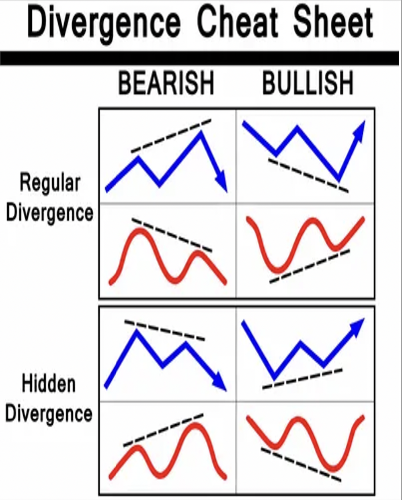

In [77]:

img=cv2.imread("/content/List_Divergences.png")
img=cv2.resize(img,(402,500))
cv2_imshow(img)

For simplicity reasons, the strategy for the detection of such patterns will be illustrated with the example of a Bearish Regular Divergence.

The steps are the following : 

- Choice of a financial asset, a time window and a time resolution. 
- Locating peaks on the asset chart, and those on the RSI in a given time resolution.
- Identify *interesting increases* in the asset curve. Formally, if we note $t_{1},...,t_{n}$ the instants corresponding to the highs, an interesting point associated with a high $t_{i}$, will be the point $t_{j}$ such that $j>i$, $x(t_{j})-x(t_{i})$ is maximal and the segment linking $(t_{i},x(t_{i}))$ and $(t_{j},x(t_{j}))$ doesn't intersect the price of the asset. To prevent having two points t_{i},t_{j}too far from each other, a limit length t_{j}-t_{i} can be imposed.
- Spotting interesting dips on the RSI curve (the principle is similar).
- After having obtained a list of doublets associated, on the one hand, with interesting increases in the asset $(a_{1},a_{2}),...,(a_{l-1},a_{l})$, and, on the other hand, with interesting decreases in the RSI $(b_{1},b_{2}),. ...,(b_{k-1},b_{k})$, we calculate, for $i \in [2,l], (x(a_{i})-x(a_{i-1}))\times(y(b_{i})-y(b_{i-1})$, and we check if the result is negative If it is, and the line joining $(a_{i},y(a_{i}))$ and $(a_{i+1},y(a_{i+1}))$ does not intersect the RSI, the associated doublet is added to the divergence list. For $(b_{j})_{j \in [1,k]}$, the situation is symmetrical. 
- The list of doublets obtained is then a list of divergent rises and falls. An additional step is to filter this list so that the time intervals corresponding to the divergences are 2 by 2 disjoint. 

# The code :

Installation of the needed packages 

In [ ]:
pip install stockstats
pip install yfinance

Execution of the project python scripts

In [89]:
exec(open('Imports.py').read())
exec(open('Functions_algo.py').read())

Load of the data and computing local minimas and maximas:

In [15]:
asset="AAPL"
data = yf.Ticker(asset) #AAPL can be replaced by the desired asset
dataDF = data.history(interval='1h',start='2021-2-1',end=dt.datetime.now())

l=dataDF['Close']
l=l.tolist()
(Mins,indMin,Maxs,indMax)=Extremas(l)

dataDF=Creation_rsi(dataDF)
l2=dataDF['RSI']
l2=l2.tolist()
(Mins2,indMin2,Maxs2,indMax2)=Extremas(l2)

Plot of the local minimas and maximas of the asset

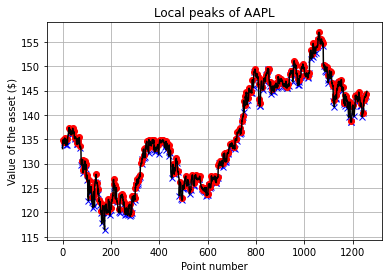

In [28]:
plt.plot(indMin,Mins,'bx')
plt.plot(indMax,Maxs,'ro')
plt.plot(l,'k')
plt.grid()
plt.xlabel('Point number')
plt.ylabel('Value of the asset ($)')
plt.title('Local peaks of {}'.format(asset))
plt.show()

**1. Bearish divergences **

Computing the *increase of interest *and the *decrease of interest* for the local maxima of the time series 

In [10]:
#Bearish 
#plusHautBas="Haut" (car Bearish)
PHHausses_interessantes_cours=pt_interessant_typeDiv(indMax,"cours",l,l2,"Haut","RegularBearish",long=50)
PHBaisses_interessantes_rsi=pt_interessant_typeDiv(indMax2,"RSI",l,l2,"Haut","RegularBearish",long=50)
PHBaisses_interessantes_cours=pt_interessant_typeDiv(indMax,"cours",l,l2,"Haut","HiddenBearish",long=50)
PHHausses_interessantes_rsi=pt_interessant_typeDiv(indMax2,"RSI",l,l2,"Haut","HiddenBearish",long=50)

Plotting the result 

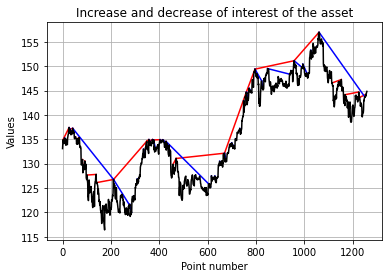

In [29]:
def BRTrace2(Hausses,Baisses,Mins,Maxs,l,title) :#Place les mins, maxs et les droites de mouvements :

    for ind in Hausses :
        tracerDroite(ind,(l[ind[0]],l[ind[1]]),"hausse")

    for ind in Baisses :
        tracerDroite(ind,(l[ind[0]],l[ind[1]]),"baisse")

    plt.plot(l,'k')
    plt.xlabel('Point number')
    plt.ylabel('Values')
    plt.grid()
    plt.title(title)
    plt.show()

BRTrace2(PHHausses_interessantes_cours,PHBaisses_interessantes_cours,Mins,Maxs,l,'Increases and decreases of interest of the asset')
#BRTrace2(PHHausses_interessantes_rsi,PHBaisses_interessantes_rsi,Mins,indMin,Maxs,indMax,l2)

When it comes to the oscillator:

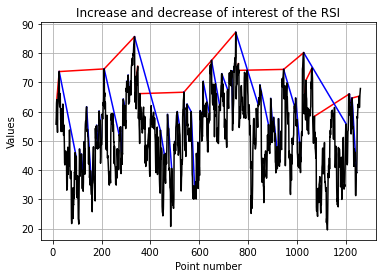

In [30]:
BRTrace2(PHHausses_interessantes_rsi,PHBaisses_interessantes_rsi,Mins,Maxs,l2,'Increases and decreases of interest of the RSI')

The application of the *Bearish regular divergence* detection provides the following figure. 

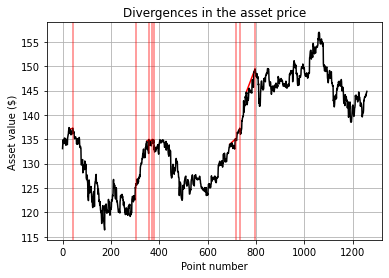

In [84]:
#Bearish Regular Divergences
BearRegDivergence=creation_divergenceBearReg(PHHausses_interessantes_cours,PHBaisses_interessantes_rsi)
BearRegDivergence_filtree=Filtration(BearRegDivergence)
BRTraceFinaux(BearRegDivergence_filtree,'Regular bearish divergence of the price','red')

For visualisation pruposes, vertical red lines have been plotted at the end of each divergence.
Without accurate analysis, the results are visually already satisfactory as divergences mainly occur when the trend reduces before changing direction. 

When it comes to Bearish hidden divergences, the result is the following.

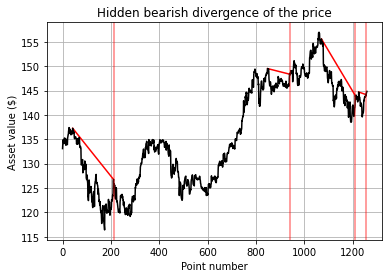

In [90]:
BearHiddenDivergence=creation_divergenceBearHidden(PHBaisses_interessantes_cours,PHHausses_interessantes_rsi)
BearHiddenDivergence_filtree=Filtration(BearHiddenDivergence)
BRTraceFinaux(BearHiddenDivergence_filtree,'Hidden bearish divergence of the price','red')

The signals are here partially satisfactory, as the signals times match with a short-term drop of the price, but not necessary with long-term drops. 

*2. Bullish divergences*

To detect, this time the Bullish divergences the *increase of interest *and the *decrease of interest* for the local minima of the time series have to be computed

In [48]:
PBBaisses_interessantes_cours=pt_interessant_typeDiv(indMin,"cours",l,l2,"Bas","RegularBullish",long=50)
PBHausses_interessantes_rsi=pt_interessant_typeDiv(indMin2,"RSI",l,l2,"Bas","RegularBullish",long=50)
PBHausses_interessantes_cours=pt_interessant_typeDiv(indMin,"cours",l,l2,"Bas","HiddenBullish",long=50)
PBBaisses_interessantes_rsi=pt_interessant_typeDiv(indMin2,"RSI",l,l2,"Bas","HiddenBullish",long=50)


When it comes to the regular divergences, the result is plotted in the next Figure 

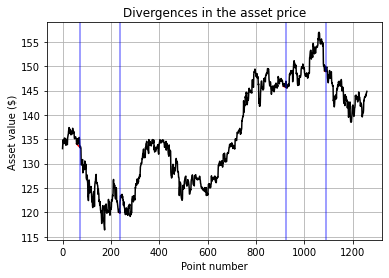

In [58]:
#Bullish Regular
BullRegDivergence=creation_divergenceBullReg(PBBaisses_interessantes_cours,PBHausses_interessantes_rsi)
BullRegDivergence_filtree=Filtration(BullRegDivergence)
BRTraceFinaux(BullRegDivergence_filtree,'blue')

The results are slightly less impressive in this case, as the amplitudes of the increases change significantly from a point to another. 

Then, the last type of divergence to evaluate are the hidden bullish divergences. 

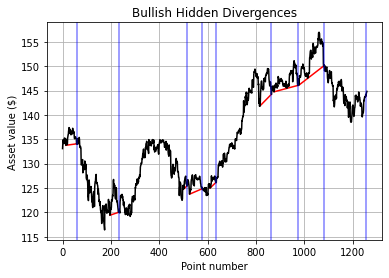

In [92]:
#Bullish Hidden
BullHiddenDivergence=creation_divergenceBullHidden(PBHausses_interessantes_cours,PBBaisses_interessantes_rsi)
BullHiddenDivergence_filtree=Filtration(BullHiddenDivergence)
BRTraceFinaux(BullHiddenDivergence,title='Bullish Hidden Divergences',color='blue')

The results are here also partially sactisfactory, and the amplitude of the increase depends of the considered point. 

# Discussions

The results of the algorithm on the detection of the four types of divergence are relevant, but as some fake signals are generated, the precision of the trading algorithm is to be improved. 

For that purpose, a criteria for eliminating the False signals has to be designed. 

A first idea would be to attribute *a score* associated to a degree of confidence of each divergence signals. A possible expression for the score of a divergence associated to the points $(t_{i},t_{j})$ could be in the form :

$$Score \propto \underbrace{(t_{j}-t_{i})}_{length} \times \underbrace{\left( \frac{x(t_{j})-x(t_{i})}{t_{j}-t_{i}} \right)}_{Relative\;increase\;price} \times \underbrace{\left( \frac{y(t_{j})-y(t_{i})}{t_{j}-t_{i}} \right)}_{Relative\;increase\;RSI}$$

# Next steps

The next steps for the improvement of the detection algorithm are the following :

- Finding a criteria for measuring the quality of a signal on the basis of the evolution of the asset after this signal.  
- Evaluating the relation between the score of the algorithm and the criteria chosen (using possibly the state of the art in Deep learning algorithms).
- Evaluating and testing the model.
- Deducing from this a trading-strategy on the real-time data (in particular, the *take profit* and the *stop loss* optimal positions. 
- Evaluating the resulting algorithm using an algorithmic platform. 
